In [1]:
#Student Name : Theddu Nikhith
#G Number :01225155

from bs4 import BeautifulSoup
import urllib
import csv
import requests
import pandas as pd
import csv
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [5]:
url = requests.get('https://repo.vse.gmu.edu/ait/AIT580/580books.html')

In [6]:
soup = BeautifulSoup(url.content,'html.parser')

In [7]:
listitems = soup.find_all('li')

In [8]:
filename = "python_books.csv"
f = open(filename, "w")
headers = "Title, Author(s), Publisher, Release Date\n"
f.write(headers)

for entry in listitems:
    
    title = entry.a.booktitle.text
    title = title.replace(",", "|")
    author = entry.author.text
    author = author.replace(",", "|")
    publisher = entry.publisher.text
    publisher = publisher.replace(",", "|")
    release = entry.release.text
    release = release.replace(",", "|")
   
    f.write(title + "," + author + "," + publisher + "," + release + "\n")

f.close()

for record in soup.findAll('tr'):
    tbltxt = ""
    for data in record.findAll('td'):
        tbltxt = tbltxt + data.text + ","
    print(tbltxt)
    print(tbltxt[0:-1])


Title
,Author(S)
,Publisher
,PubDate
,
Title
,Author(S)
,Publisher
,PubDate

Learning Python,Mark Lutz,O'Reilly Media,June 2013,
Learning Python,Mark Lutz,O'Reilly Media,June 2013
Web Scraping with Python,Ryan Mitchell,O'Reilly Media,November 2017,
Web Scraping with Python,Ryan Mitchell,O'Reilly Media,November 2017
Python Coding for Kids,Don Wilcher,Maker Media, Inc,September 2017,
Python Coding for Kids,Don Wilcher,Maker Media, Inc,September 2017
Python Machine Learning By Example,Yuxi Liu,Packt Publishing,May 2017,
Python Machine Learning By Example,Yuxi Liu,Packt Publishing,May 2017
Python Data Structures and Algorithms,Benjamin Baka,Packt Publishing,May 2017,
Python Data Structures and Algorithms,Benjamin Baka,Packt Publishing,May 2017
Python in a Nutshell,Alex Martelli, Anna Ravenscroft,O'Reilly Media,April 2017,
Python in a Nutshell,Alex Martelli, Anna Ravenscroft,O'Reilly Media,April 2017
Invent Your Own Computer Games with Python,Al Sweigart,No Starch Press,December 2016,
Inven

In [9]:
df=pd.read_csv('C:/Users/Owner/Downloads/AIT580-master/Python_assignment_12/python_books.csv')
data=df[' Publisher'].value_counts()
print(data)

O'Reilly Media         4
Packt Publishing       2
Maker Media| Inc       1
Elsevier / Syngress    1
Pragmatic Bookshelf    1
No Starch Press        1
Name:  Publisher, dtype: int64


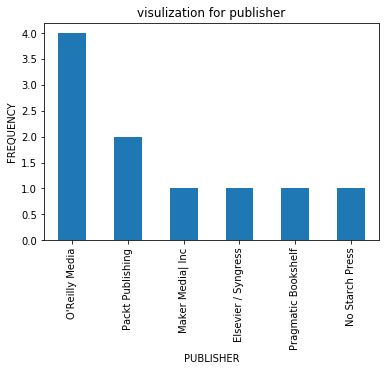

In [10]:
data.plot(kind='bar')
plt.xlabel('PUBLISHER')
plt.ylabel('FREQUENCY')
plt.title('visulization for publisher')
plt.show()

In [21]:
print(df[' Release Date'])

0         June 2013
1     November 2017
2    September 2017
3          May 2017
4          May 2017
5        April 2017
6     December 2016
7     November 2016
8    September 2016
9       August 2016
Name:  Release Date, dtype: object


In [25]:
df['year'] = pd.DatetimeIndex(df[' Release Date']).year

In [28]:
data1=df['year'].value_counts()
print(data1)

2017    5
2016    4
2013    1
Name: year, dtype: int64


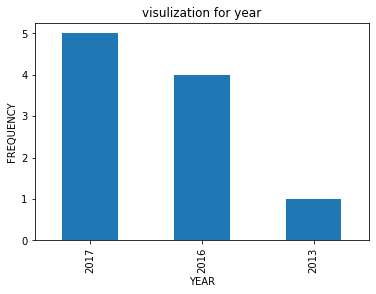

In [29]:
data.plot(kind='bar')
plt.xlabel('YEAR')
plt.ylabel('FREQUENCY')
plt.title('visulization for year')
plt.show()